In [1]:
import pandas as pd

# Load the datasets
applications_df = pd.read_csv('cleaned_applications.csv')
branches_df = pd.read_csv('cleaned_branches.csv')
customers_df = pd.read_csv('cleaned_customers.csv')
defaults_df = pd.read_csv('cleaned_defaults.csv')
loans_df = pd.read_csv('cleaned_loans.csv')
transactions_df = pd.read_csv('cleaned_transactions.csv')

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [3]:
# Merge applications and loans dataframes
merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

# Filter for Approved applications and Active loans
filtered_df = merged_df[(merged_df['Approval_Status'] == 'Approved') & (merged_df['Loan_Status'] == 'Active')]

# The customer ID column in filtered_df is 'Customer_ID_x' and in customers_df is 'Customer_ID'.
# Merge with customers_df to get region information using the correct column names.
loans_by_region = pd.merge(filtered_df, customers_df[['Customer_ID', 'Region']], left_on='Customer_ID_x', right_on='Customer_ID', how='left')

# Group by region and count active loans
active_loans_by_region = loans_by_region['Region'].value_counts().reset_index()
active_loans_by_region.columns = ['Region', 'Active Loan Count']

# Display the result
display(active_loans_by_region)

Region  Active Loan Count
0       East               3982
1       West               3924
2      North               3911
3    Central               3864
4      South               3842
5  Northeast               3813

In [4]:
# Merge defaults and loans dataframes
defaults_loans_df = pd.merge(defaults_df, loans_df, on='Loan_ID', how='inner')

# Print columns of defaults_loans_df to identify the correct customer ID column
print(defaults_loans_df.columns)

Index(['Default_ID', 'Loan_ID', 'Customer_ID_x', 'Default_Date',
       'Default_Amount', 'Default_Reason', 'Recovery_Status',
       'Recovery_Amount', 'Legal_Action', 'Customer_ID_y', 'Loan_Amount',
       'Interest_Rate', 'Loan_Term', 'Disbursal_Date', 'Repayment_Start_Date',
       'Repayment_End_Date', 'Loan_Status', 'Overdue_Amount', 'EMI_Amount',
       'Collateral_Details'],
      dtype='object')


In [5]:
# Merge defaults and loans dataframes
defaults_loans_df = pd.merge(defaults_df, loans_df, on='Loan_ID', how='inner')

# Merge with customers_df to get region information for defaulted loans using 'Customer_ID_x'
defaults_loans_region_df = pd.merge(defaults_loans_df, customers_df[['Customer_ID', 'Region']], left_on='Customer_ID_x', right_on='Customer_ID', how='left')

# Group by region and count defaults
default_counts = defaults_loans_region_df['Region'].value_counts().reset_index()
default_counts.columns = ['Region', 'Default Count']

# Filter the merged_df dataframe for 'Approved' applications with 'Active' or 'Closed' loan statuses.
approved_loans_df = merged_df[(merged_df['Approval_Status'] == 'Approved') & (merged_df['Loan_Status'].isin(['Active', 'Closed']))]

# Merge the filtered merged_df with customers_df to get region information for all approved loans.
# The customer ID column in approved_loans_df is 'Customer_ID_x' and in customers_df is 'Customer_ID'.
approved_loans_region_df = pd.merge(approved_loans_df, customers_df[['Customer_ID', 'Region']], left_on='Customer_ID_x', right_on='Customer_ID', how='left')

# Group the dataframe from the previous step by 'Region' and count the total number of approved loans.
total_loan_counts = approved_loans_region_df['Region'].value_counts().reset_index()
total_loan_counts.columns = ['Region', 'Total Loan Count']

# Merge default_counts and total_loan_counts dataframes on the 'Region' column.
regional_default_rates = pd.merge(default_counts, total_loan_counts, on='Region', how='inner')

# Calculate the default rate for each region.
regional_default_rates['Default Rate'] = regional_default_rates['Default Count'] / regional_default_rates['Total Loan Count']

# Display the dataframe containing the region, default counts, total loan counts, and calculated default rates.
display(regional_default_rates)

Region  Default Count  Total Loan Count  Default Rate
0       East           1200              7831      0.153237
1       West           1171              7878      0.148642
2      North           1169              7784      0.150180
3      South           1161              7770      0.149421
4    Central           1158              7641      0.151551
5  Northeast           1155              7796      0.148153

In [6]:
# Merge loans_df and customers_df on the 'Customer_ID' column
loans_customers_df = pd.merge(loans_df, customers_df, on='Customer_ID', how='inner')

# Check the columns of customers_df to confirm the rural/urban status column
print(customers_df.columns)

Index(['Customer_ID', 'Full_Name', 'Contact_Number', 'Email', 'Address', 'Age',
       'Gender', 'Marital_Status', 'Employment_Status', 'Annual_Income',
       'Credit_Score', 'Region', 'Account_Tenure', 'Relationship_Manager_ID'],
      dtype='object')


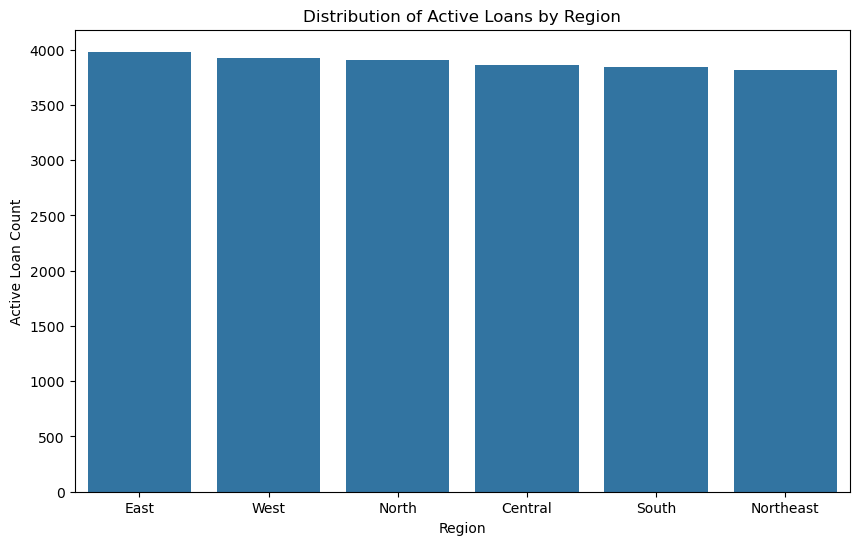

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart for active loans by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Active Loan Count', data=active_loans_by_region)
plt.title('Distribution of Active Loans by Region')
plt.xlabel('Region')
plt.ylabel('Active Loan Count')
plt.show()

# Create a bar chart for default rates by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Default Rate', data=regional_default_rates)
plt.title('Default Rates by Region')
plt.xlabel('Region')
plt.ylabel('Default Rate')
plt.show()